# Pandas Review

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

You can find it here: http://pandas.pydata.org/

And the documentation can be found here: http://pandas.pydata.org/pandas-docs/stable/

In this notebook we review some of its functionality.

In [20]:
import pandas as pd
%matplotlib inline

In [4]:
df=pd.read_csv('../data/weight-height.csv')

In [5]:
# df = pd.read_csv("../data/titanic-train.csv")

## Quick exploration

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.4+ KB


In [8]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


## New in 0.19: category parsing

In [ ]:
df = pd.read_csv("../data/titanic-train.csv",
                 dtype={'Pclass': 'category',
                        'Sex': 'category',
                        'Embarked': 'category'}
                )

In [ ]:
df.head()

In [ ]:
df.info()

## Indexing

Try to figure out what each of the following indexing method does.

If in trouble check here: http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [9]:
df.ix[0]

Gender       Male
Height     73.847
Weight    241.894
Name: 0, dtype: object

In [10]:
df.iloc[3]

Gender       Male
Height     71.731
Weight    220.042
Name: 3, dtype: object

In [11]:
df.loc[0:4,'Gender']

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [13]:
df['Height'].head(3)

0    73.847017
1    68.781904
2    74.110105
Name: Height, dtype: float64

In [14]:
df[['Weight', 'Height']]

,Weight,Height
0,241.893563,73.847017
1,162.310473,68.781904
2,212.740856,74.110105
3,220.042470,71.730978
4,206.349801,69.881796
5,152.212156,67.253016
6,183.927889,68.785081
7,167.971110,68.348516
8,175.929440,67.018950
9,156.399676,63.456494


## Selections


Try to figure out what each of the following indexing method does.

If in trouble check here: http://pandas.pydata.org/pandas-docs/stable/indexing.html#the-where-method-and-masking

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

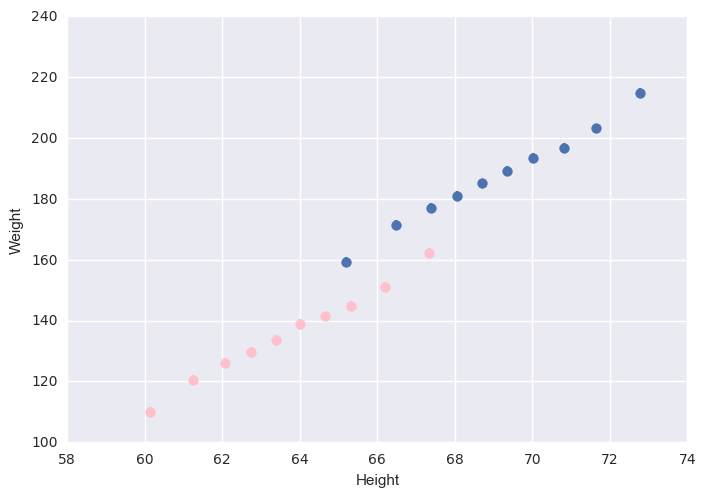

In [29]:
fig, ax = plt.subplots()
males = df[df.Gender == 'Male']
females = df[df.Gender == 'Female']

sns.regplot(x=males['Height'],
            y=males['Weight'],
            x_bins=10, fit_reg=None, ax=ax)

sns.regplot(x=females['Height'],
            y=females['Weight'],
            x_bins=10, fit_reg=None, ax=ax, color='pink')

In [ ]:
df[df.Gender > 70]

In [ ]:
age = df['Age']
age.where(age > 30).head()

In [ ]:
df[(df['Age'] == 11) & (df['SibSp'] == 5)]

In [ ]:
df[(df.Age == 11) | (df.SibSp == 5)]

In [ ]:
df.query('(Age == 11) & (SibSp == 5)')

## Distinct elements

In [ ]:
df['Embarked'].unique()

## Group by

Pandas supports many SQL-like operations like group by, order by and join. In pandas they are called:
- groupby
- sort_values
- merge

See some examples below and refer to:

http://pandas.pydata.org/pandas-docs/stable/groupby.html

http://pandas.pydata.org/pandas-docs/stable/merging.html

In [ ]:
# Find average age of passengers that survived vs. died
df.groupby('Survived')['Age'].mean()

In [ ]:
df.sort_values('Age', ascending = False).head()

In [ ]:
pd.merge(df[['PassengerId', 'Survived']],
         df[['PassengerId', 'Age']],
         on='PassengerId').head()

## Pivot Tables

Pandas also supports Excel-like functionality like pivot tables

see: http://pandas.pydata.org/pandas-docs/stable/reshaping.html

In [ ]:
df.pivot_table(index='Pclass', columns='Survived', values='PassengerId', aggfunc='count')

In [ ]:
df['Pclass'].value_counts()

Theres much more that Pandas can do for you. Make sure to check the documentation: http://pandas.pydata.org/pandas-docs/stable/

## Exercises:

- select passengers that survived
- select passengers that embarked in port S
- select male passengers
- select passengers who paid less than 40.000 and were in third class
- locate the name of passegner Id 674
- calculate the average age of passengers using the function mean()
- count the number of survived and the number of dead passengers
- count the number of males and females
- count the number of survived and dead per each gender
- calculate average price paid by survived and dead people


*Copyright &copy; 2015 Dataweekends.  All rights reserved.*